# **Pathlib - A data loader tool.**
- Helps in creating a path object instead of a string notation. So, takes care of the underlying file system and makes the code compatible for different platforms.

In [1]:
from pathlib import Path

In [2]:
# Gets the current working directory.
Path.cwd()

PosixPath('/home/shar1/MyNotes/fast_dl2')

In [3]:
# different ways of callin the function. 
pascal_train_2007 = Path.cwd().joinpath("data/pascal/pascal_train2007.json")
pascal_test_2007 = Path.cwd()/"data/pascal/pascal_test_2007.json"

print(pascal_test_2007)
print(pascal_train_2007)

/home/shar1/MyNotes/fast_dl2/data/pascal/pascal_test_2007.json
/home/shar1/MyNotes/fast_dl2/data/pascal/pascal_train2007.json


In [4]:
# for joining multiple directories

parts = ["data/pascal/pascal_train2007.json", "data/pascal/VOC2007"]
joined_pascal_2007 = Path.cwd().joinpath(*parts)

print(parts)

['data/pascal/pascal_train2007.json', 'data/pascal/VOC2007']


In [5]:
# Lets checkout the goodies offered by pathlib.
pascal = Path.cwd()/"data/pascal"
pascal.iterdir(), pascal.is_dir(), pascal.is_file(), pascal.parent, pascal.parts

#The generator object helps us to iterate over the files/folders inside this directory.
#PosixPath ---> linux file-system thing. can be avoided by wrapping str().

(<generator object Path.iterdir at 0x7f7984329c50>,
 False,
 False,
 PosixPath('/home/shar1/MyNotes/fast_dl2/data'),
 ('/', 'home', 'shar1', 'MyNotes', 'fast_dl2', 'data', 'pascal'))

# **Lambda Functions**

In [28]:
import numpy as np
num = [2, 8, 4, 23, 21, 9, 4, 6]

In [56]:
function_anony = lambda x, y : x + y
print(function_anony(1,2)) # first printed line.

lf1 = filter(lambda x: x % 3 == 0, num)
print(list(lf1)) # Second printed line.

lf2 = map(lambda x: x * 2 + 10, num)
print(list(lf2))# Third printed line.

3
[21, 9, 6]
[14, 26, 18, 56, 52, 28, 18, 22]


[3, 6, 9]

# **List, Dictionary Comprehensions**
- List comprehensions are a tool for transforming one list (any iterable actually) into another list. During this transformation, elements can be conditionally included in the new list and each element can be transformed as needed.
- same goes for dictionary comprehensions

In [59]:
[], {}, () # list, dictionary, tuple. Python takes tuple as default input.

([], {}, ())

In [60]:
numbers = [1, 2, 3, 4, 5]

List comprehenssion minimizes the code below
```
for n in numbers:
    if n%2 == 1:
        n.append(n*2)
```

In [62]:
doubled_odds = [n * 2 for n in numbers if n % 2 == 1]; doubled_odds #The need the conditional list comprehension

[2, 6, 10]

In [63]:
matrix = [[2,3], [3, 2]]

In [64]:
flattened = [n*2 for row in matrix for n in row]; flattened #Nested list comprehension.

[4, 6, 6, 4]

In [16]:
word = "fastAI"

In [17]:
dictionary = {i:w for i,w in enumerate(word)} ; dictionary

{0: 'f', 1: 'a', 2: 's', 3: 't', 4: 'A', 5: 'I'}

In [18]:
flipped = {value: key for key, value in dictionary.items()}; flipped #default sorted output

{'A': 4, 'I': 5, 'a': 1, 'f': 0, 's': 2, 't': 3}

# **Matplotlib**
- Allows us to implement production quality graphics using very less code.

In [6]:
%matplotlib inline #for displaying images within the notebook

UsageError: unrecognized arguments: #for displaying images within the notebook


In [7]:
import matplotlib.pyplot as plt
import numpy as np

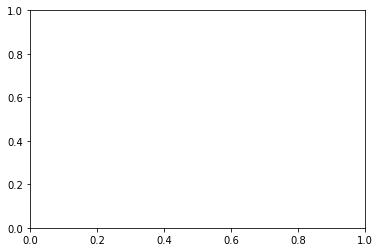

In [12]:
fig = plt.figure()  # a new figure window
ax = fig.add_subplot(1, 1, 1)  # specify (nrows, ncols, axnum)

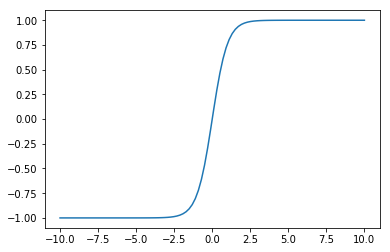

In [13]:
x = np.linspace(-10, 10, 100)
y = np.tanh(x)

ax.plot(x, y)
display(fig)

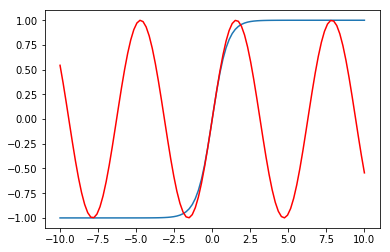

In [14]:
y2 = np.sin(x)
ax.plot(x, y2, 'r')

display(fig)

# Generators, Iterators

Pythons' **`iter()`** method will create an iterator object and start at the beginning of the dataset. And afterwards our iterator will have **`__next__`** that can be used to pull a mini-batch

# Decoraters

In [3]:
from functools import wraps


def beg(target_function):
    print(1)
    @wraps(target_function)
    print(2)
    def wrapper(*args, **kwargs):
        print(3)
        msg, say_please = target_function(*args, **kwargs)
        if say_please:
            return "{} {}".format(msg, "Please! I am poor :(")
        return msg

    return wrapper


@beg
def say(say_please=False):
    msg = "Can you buy me a beer?"
    return msg, say_please


print (say())  # Can you buy me a beer?
print (say(say_please=True))  # Can you buy me a beer? Please! I am poor :(

Can you buy me a beer?
Can you buy me a beer? Please! I am poor :(


# Debugger

```
> <ipython-input-99-6d7dd6a3d3cc>(4)<module>()
-> ima=md.val_ds.denorm(x)[i]
(Pdb) h

Documented commands (type help <topic>):
========================================
EOF    c          d        h         list      q        rv       undisplay
a      cl         debug    help      ll        quit     s        unt      
alias  clear      disable  ignore    longlist  r        source   until    
args   commands   display  interact  n         restart  step     up       
b      condition  down     j         next      return   tbreak   w        
break  cont       enable   jump      p         retval   u        whatis   
bt     continue   exit     l         pp        run      unalias  where    

Miscellaneous help topics:
==========================
exec  pdb
```

Can view variables throughout the debugging process
```
(Pdb) n # will go to next step

(Pdb) l # will show the currentlocation
  1  	fig, axes = plt.subplots(3, 4, figsize=(12, 8))
  2  	for i,ax in enumerate(axes.flat):
  3  	    pdb.set_trace()
  4  ->	    ima=md.val_ds.denorm(x)[i]
  5  	    b = md.classes[preds[i]]
  6  	    ax = show_img(ima, ax=ax)
  7  	    draw_text(ax, (0,0), b)
  8  	plt.tight_layout()
[EOF]

(Pdb) s # will go into a function

(Pdb) c # continue to next break point
```

# Other Random Useful Functions.

## Reduce Function

In [ ]:
b = reduce()

In [ ]:
from functools import reduce
su = reduce(lambda )
reduce(lambda x : pd.read)

In [ ]:
s = reduce(lamp x1,x2: x1+x2, axis=1)
su = reduce(lamba x1,x2 : pd.concat([x1, x2], 

mkl library optimizers

decoraters(functions passed as input and get another as output), iterators, generators.